# Data Science in Action Project 

#### Leonardo Crescenzi - Simone Lu - Enrico Romano 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## The Datasets

In [2]:
#df0 =pd.read_excel('Invoices_Payment condition_v.1.0.xlsx')
df1 = pd.read_excel('Invoices_v2.0.xlsx')
df2 = pd.read_excel('Planned_Good_Receipts_22_v.1.0.xlsx')
df3 =pd.read_excel('Goods_Receipts_v2.0.xlsx')

In [3]:
print(df2.isnull().sum())

ID Goods receipts       0
Planned Month           0
ID (Material Group)    24
Type                    0
Amount                  0
dtype: int64


# Exploratory Data Analysis

### Invoice Payments
We started our analysis with the 'Invoices' dataset. So, we have plotted some of the most important features, in order to have a better understanding of the variables. 
Before plots, we have created a new variable, i.e. , quarter which clusters 'Invoice date' into different quarters for each year. Moreover, we have decided to remove the variable 'Contract' because it has more then 6000 missing values that are not possible to estimate. Then, we drop the other missing values from the other columns.


In [91]:
df11 = df1.copy()
df11=df11.drop('Contract', axis=1, inplace=False)

In [92]:
print(df11.isnull().sum())

ID Invoice              0
Invoice date            0
Posting date            0
Amount                  0
ID Company Group        0
Invoice Due Date        0
Invoice Status          0
ID Purchase Order    1273
Payment Condition     148
Industry Group          2
User Code               0
ID Supplier             0
pos/neg                 0
dtype: int64


In [93]:
df11=df11.dropna()

In [106]:
df11['quarter'] = pd.PeriodIndex(df11['Invoice date'], freq = 'Q')

To obtain the figures below, which refer to Amount per quarters, we filtered the dataset in order to divide the amounts that refer to an Invoice Status = Free, from those that refer to an Invoice status = Blocked.
From the first figure, which refers to Invoice status=Free, negative values can be seen in some quarters; this is not present, however, in the graph with Invoice Status = Blocked.

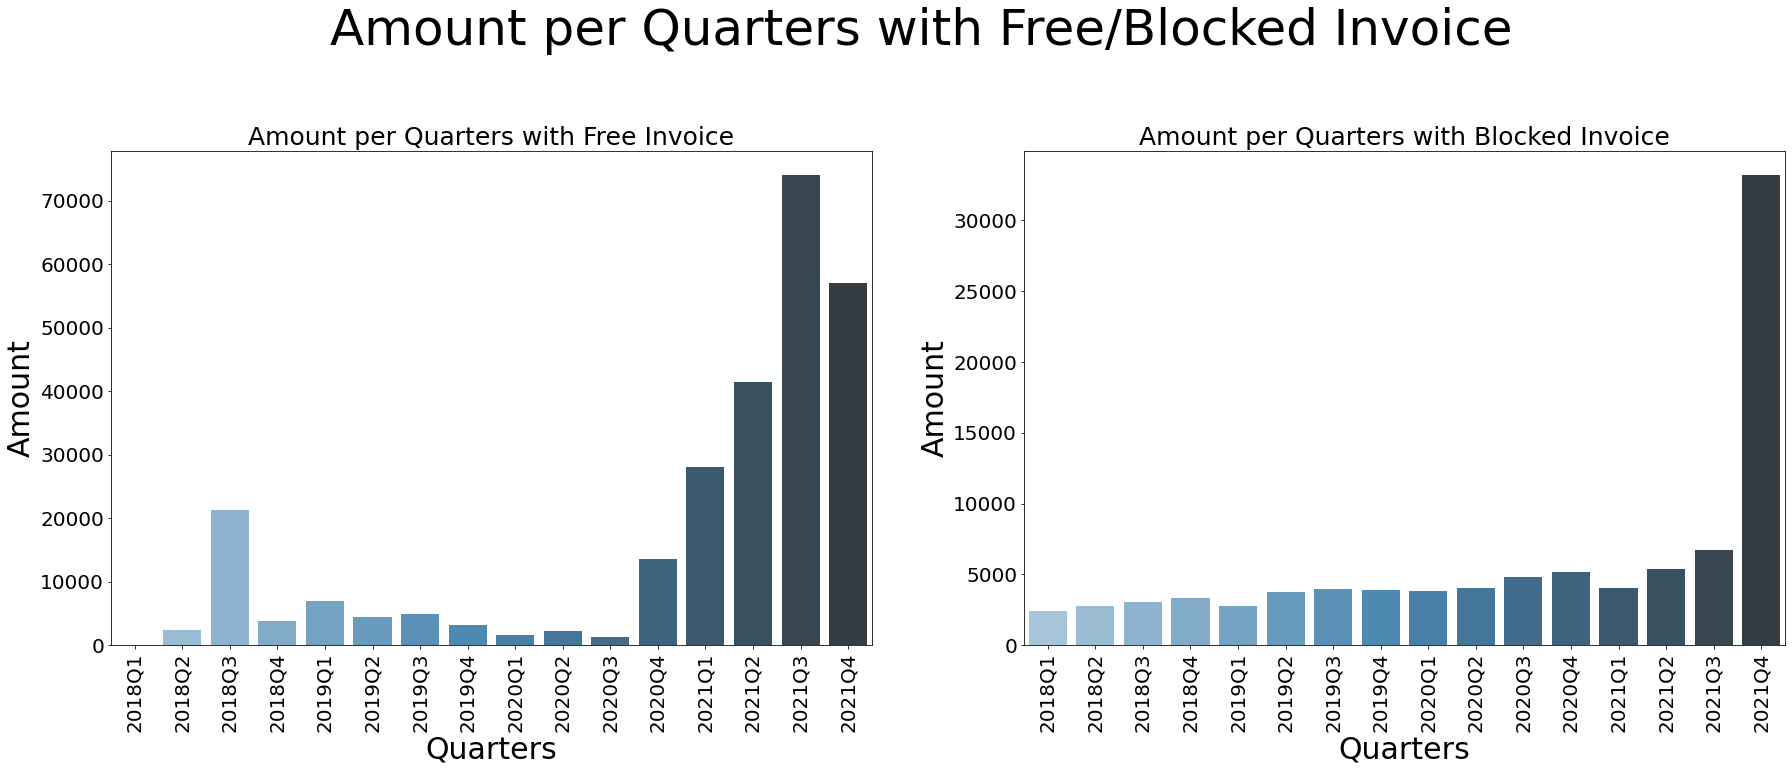

In [107]:
f2 = plt.figure(figsize=(30,20),constrained_layout=False)
gs = f2.add_gridspec(2, 2)
f2.suptitle("Amount per Quarters with Free/Blocked Invoice",fontsize=50)

f2_ax1 = f2.add_subplot(gs[0,0])
df1filter=df11[df11['Invoice Status']== 'Free']

ax=sns.barplot(y='Amount',x='quarter', data=df1filter,ci=None, palette='Blues_d' )
_=plt.xticks(rotation=90,size=20)
_=plt.yticks(size=20)
_=plt.xlabel('Quarters', fontsize=30)
_=plt.ylabel('Amount', fontsize=30)
plt.title('Amount per Quarters with Free Invoice',fontsize=25)

f2_ax1 = f2.add_subplot(gs[0,1])
df1filter2=df11[df11['Invoice Status']== 'Blocked']

ax=sns.barplot(y='Amount',x='quarter', data=df1filter2,ci=None, palette='Blues_d' )
_=plt.xticks(rotation=90,size=20)
_=plt.yticks(size=20)
_=plt.xlabel('Quarters', fontsize=30)
_=plt.ylabel('Amount', fontsize=30)
_=plt.title('Amount per Quarters with Blocked Invoice',fontsize=25)

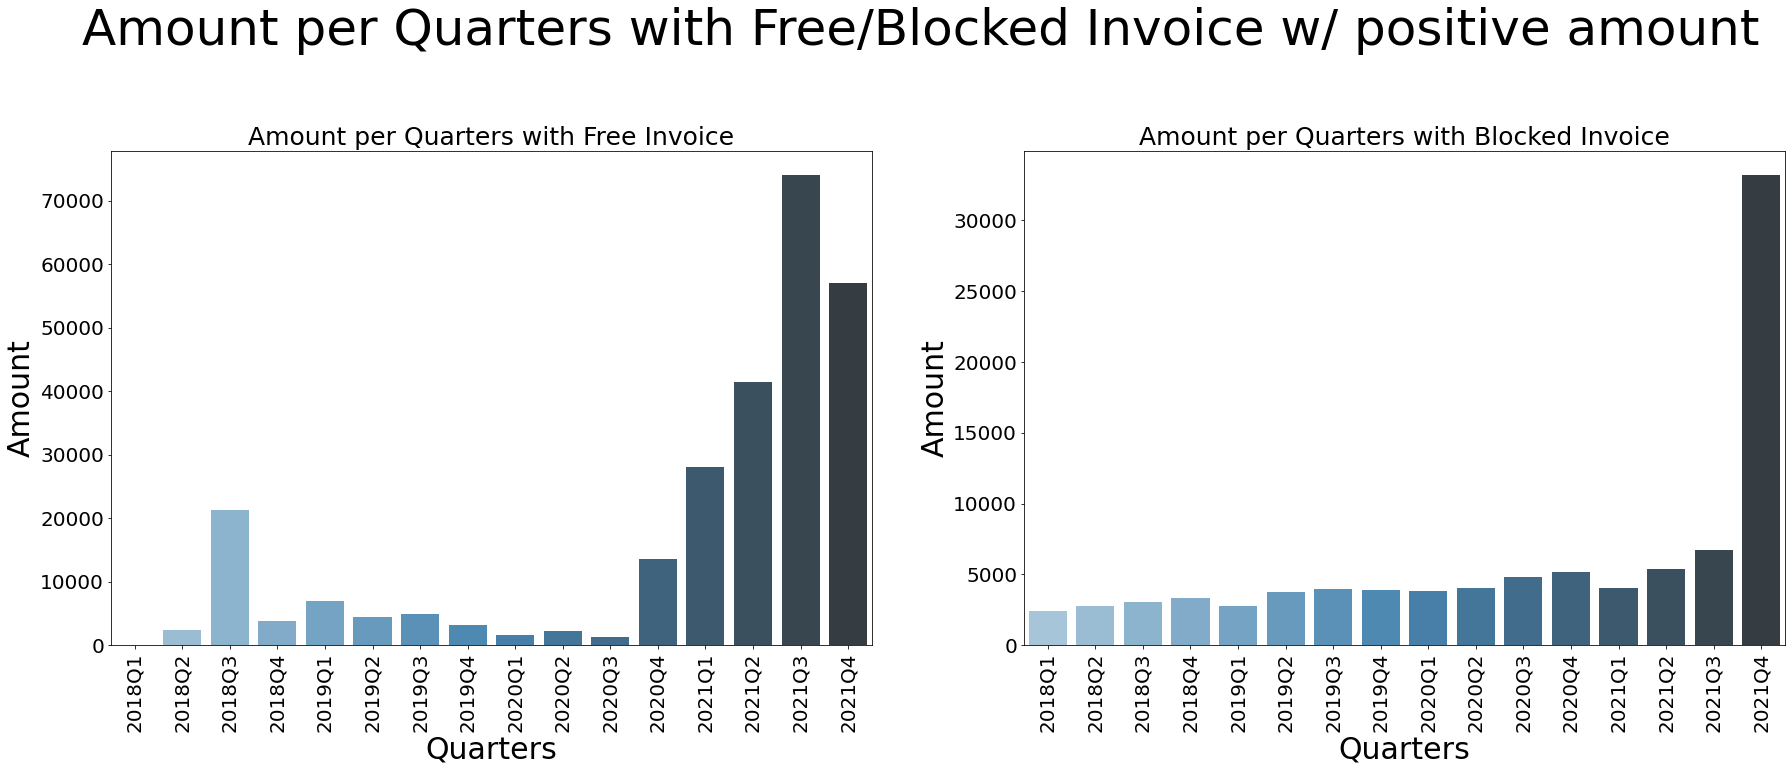

In [108]:
df11=df11[df11['Amount']>0]
f2 = plt.figure(figsize=(30,20),constrained_layout=False)
gs = f2.add_gridspec(2, 2)
f2.suptitle("Amount per Quarters with Free/Blocked Invoice w/ positive amount",fontsize=50)

f2_ax1 = f2.add_subplot(gs[0,0])
df1filter=df11[df11['Invoice Status']== 'Free']

ax=sns.barplot(y='Amount',x='quarter', data=df1filter,ci=None, palette='Blues_d' )
_=plt.xticks(rotation=90,size=20)
_=plt.yticks(size=20)
_=plt.xlabel('Quarters', fontsize=30)
_=plt.ylabel('Amount', fontsize=30)
plt.title('Amount per Quarters with Free Invoice',fontsize=25)

f2_ax1 = f2.add_subplot(gs[0,1])
df1filter2=df11[df11['Invoice Status']== 'Blocked']

ax=sns.barplot(y='Amount',x='quarter', data=df1filter2,ci=None, palette='Blues_d' )
_=plt.xticks(rotation=90,size=20)
_=plt.yticks(size=20)
_=plt.xlabel('Quarters', fontsize=30)
_=plt.ylabel('Amount', fontsize=30)
_=plt.title('Amount per Quarters with Blocked Invoice',fontsize=25)

Then, we count the number of Blocked and Free Invoices with the countplot.

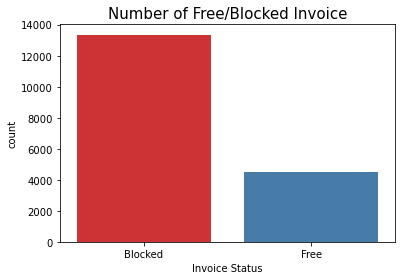

In [40]:
_=sns.countplot(data = df1, x = 'Invoice Status', palette="Set1")
_=plt.title('Number of Free/Blocked Invoice',fontsize=15)

And we created a new variable 'pos/neg', which refers to the number of positive and negative values in Amount. In this way, we know, thanks to the countplot, how many Blocked and Free Invoices have positive values and how many negative values.

In [11]:
posneg = []

for i in df1['Amount']:
    if i<=0 : 
        posneg.append('Neg. Inv.')
    else: 
        posneg.append('Pos. Inv.')
        
df1['pos/neg'] = posneg

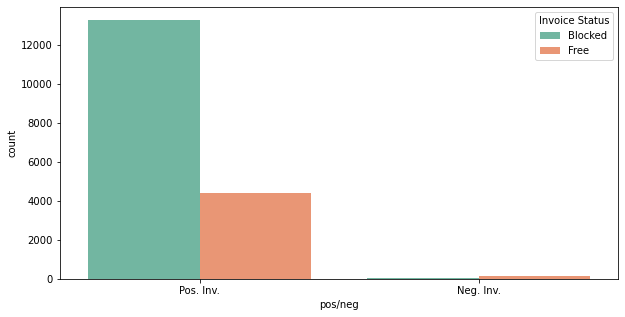

In [12]:
plt.figure(figsize=(10,5))
_=sns.countplot(data = df1, x = "pos/neg", hue="Invoice Status", palette="Set2")

Last plot is useful to understand which are the payment condition for each invoice status. So, for Blocked invoice we have a 70.88% of J000, while for Free Invoice, we have 16.23% of F060. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


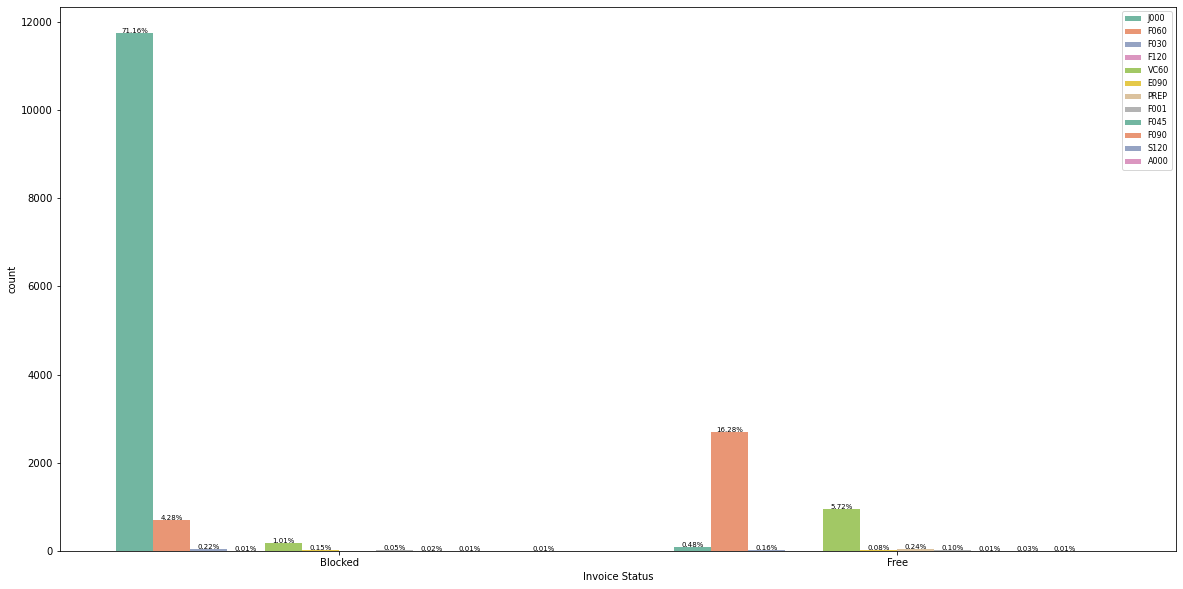

In [13]:
plt.figure(figsize=(20,10))
ax = sns.countplot(data = df11, x = "Invoice Status", hue="Payment Condition", palette="Set2")
plt.legend(fontsize=8,loc='upper right')
n_records = float(len(df11))
# Looping over entire dataset to add perentage values as labels
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 1, '{:1.2%}'.format(height/n_records), ha="center", fontsize =7)

### Good receipts
The same analysis has been done also for the second dataset. So, also there we have removed the missing values and also the vairable 'Cost center' because there are more than 20'000 missing values out of 27'000 observations. 
Then, we add the variable quarter. 

In [14]:
print(df3.isnull().sum())

ID Purchase order               18
ID Goods Receipts                0
ID Company Group                 0
Document code                    0
Document code description        0
Date                             0
Amount                           0
GR internal Code              2859
GR Type                       2859
Cost Center                  20609
ID Supplier                    244
dtype: int64


In [15]:
df33=df3.copy()
df33['quarter'] = pd.PeriodIndex(df33['Date'], freq = 'Q')
df3.head()

,ID Purchase order,ID Goods Receipts,ID Company Group,Document code,Document code description,Date,Amount,GR internal Code,GR Type,Cost Center,ID Supplier
0,3.000058e+09,1811000086,GX01,TF,Other (paid Invoice),2018-01-04,-3000.00,2GV1A0LIN,Investment,NaN,401988.0
1,4.000063e+09,1811000130,TR26,TF,Other (paid Invoice),2018-01-02,-7727.24,2CS1A0LIN,Investment,NaN,-90196.0
2,3.000060e+09,1811000395,EX01,TF,Other (paid Invoice),2018-01-12,-40757.00,NaN,NaN,NaN,108186.0
3,3.000061e+09,1811000468,FX01,TF,Other (paid Invoice),2018-01-10,-432.45,NaN,NaN,NaN,123514.0
4,3.000061e+09,1811000469,FX01,TF,Other (paid Invoice),2018-01-10,-348.75,NaN,NaN,NaN,123514.0


In [16]:
df33=df33.drop('Cost Center', axis=1, inplace=False)

In [17]:
df33=df33.dropna(axis = 0)

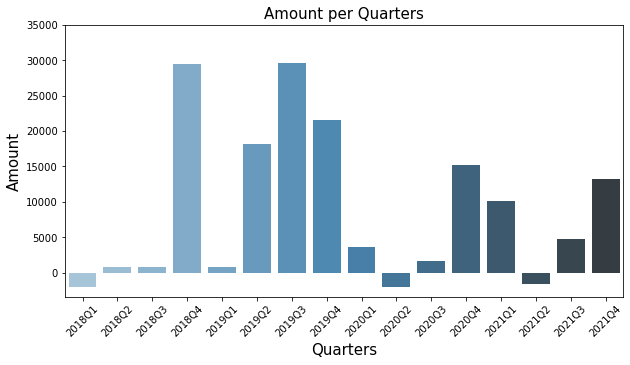

In [18]:
#amount per quarter
plt.figure(figsize=(10,5))
px=sns.barplot(y='Amount',x='quarter', data=df33,ci=None, palette='Blues_d' )
_=px.set(ylim=[-3400,35000])
_=plt.xticks(rotation=45,size=10)
_=plt.yticks(size=10)
_=plt.xlabel('Quarters', fontsize=15)
_=plt.ylabel('Amount', fontsize=15)
_=plt.title('Amount per Quarters',fontsize=15)

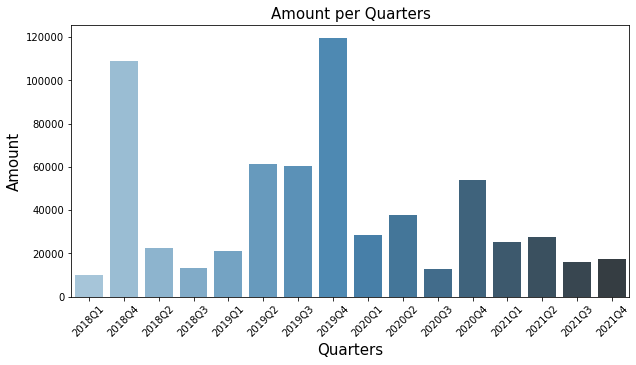

In [19]:
df33=df33[df33['Amount']>0]
plt.figure(figsize=(10,5))
px=sns.barplot(y='Amount',x='quarter', data=df33,ci=None, palette='Blues_d' )
_=plt.xticks(rotation=45,size=10)
_=plt.yticks(size=10)
_=plt.xlabel('Quarters', fontsize=15)
_=plt.ylabel('Amount', fontsize=15)
_=plt.title('Amount per Quarters',fontsize=15)

Also for this dataset we created the variable 'pos/neg', in order to understand how many positive and negative value are in Investment or Other GR Type.

In [20]:
posneg = []

for i in df3['Amount']:
    if i<=0 : 
        posneg.append('Neg. Inv.')
    else: 
        posneg.append('Pos. Inv.')
        
df3['pos/neg'] = posneg

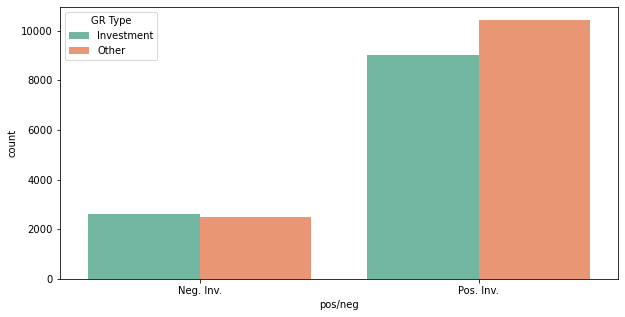

In [21]:
plt.figure(figsize=(10,5))
_=sns.countplot(data = df3, x = "pos/neg", hue="GR Type", palette="Set2")

The countplot below, count the number of investment or other encoded by the Document code description. 

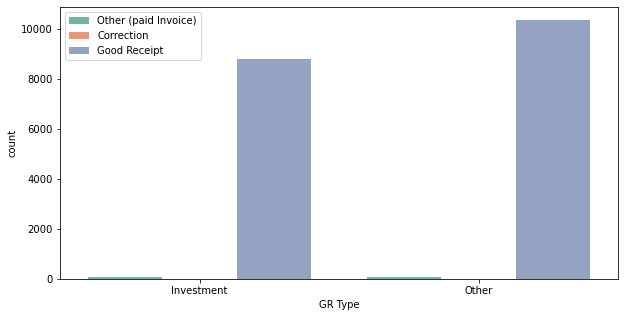

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data = df33, x = "GR Type", hue="Document code description", palette="Set2")
_=plt.legend(fontsize=10)

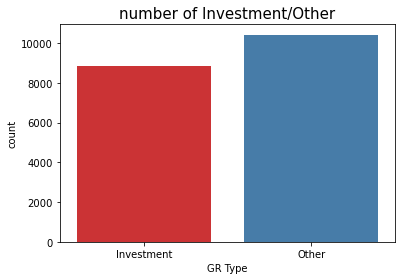

In [23]:
cp = sns.countplot(data = df33, x = 'GR Type', palette="Set1")
_=plt.title('number of Investment/Other',fontsize=15)

In conclusion, there is a scatterplot. In order to avoid flattening of the scatterplot, we have decided to implement a x and y limits. In this way the graph is more 'zoomed in'. 

<Figure size 432x288 with 0 Axes>

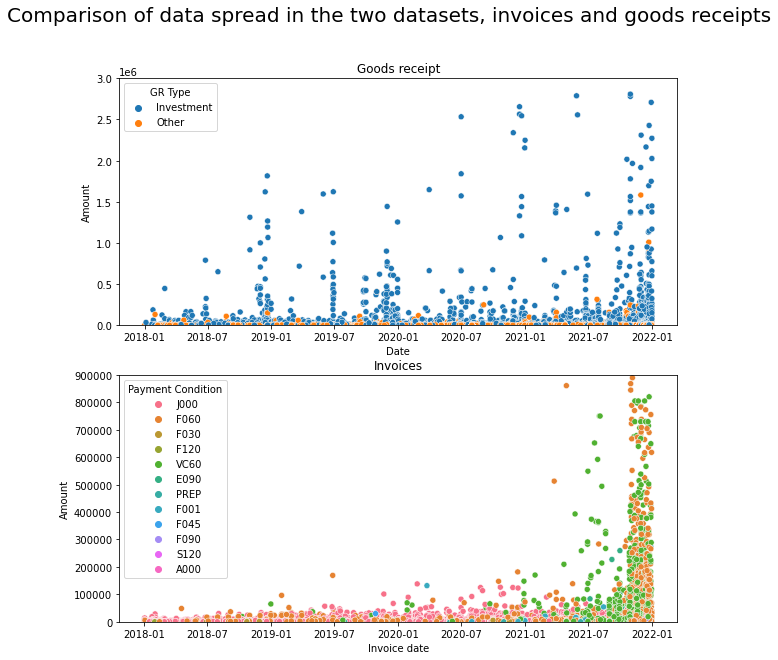

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

In [24]:
_=plt.figure()
fig, axes = plt.subplots(2,1, figsize = (10,10))
_=fig.suptitle('Comparison of data spread in the two datasets, invoices and goods receipts',fontsize=20)
#scatterplot with amount and date in Goods receipt dataset
_=plt.figure(figsize=(10,5))
sp1=sns.scatterplot(x='Date',y='Amount',hue='GR Type',data=df33, ax = axes [0])
_=sp1.set(ylim=[0,3000000])
_=axes[0].set_title('Goods receipt')

#scatterplot with amount and date in Invoices dataset
_=plt.figure(figsize=(10,5))
sp2=sns.scatterplot(x='Invoice date',y='Amount',hue='Payment Condition',data=df11,ax = axes[1])
_=sp2.set(ylim=[0,900000])
_=axes[1].set_title('Invoices')



## Affinity analysis
It has been realized that inside the dataset "Goods_receipt" there are the transactions that the company has made in the years x - x , and moreover it is the only dataset that shows us the type of good or service (GR Internal Code) that is purchased. Then according to the theory of Affinity Analysis, also known as Market Basket Analysis, it extracts "accidental" patterns of purchases that may influence the purchase of another product or service. In fact, in order to extract this pattern, we have observed that more transactions under the same ['ID purchase order'] were distinguished on the basis of the type of good or service purchased.

In [25]:
df33.head()

,ID Purchase order,ID Goods Receipts,ID Company Group,Document code,Document code description,Date,Amount,GR internal Code,GR Type,ID Supplier,quarter
25,4.000066e+09,1811001234,TR26,TF,Other (paid Invoice),2018-01-31,190.00,2SR1A0LIN,Investment,129083.0,2018Q1
26,4.000066e+09,1811001235,TR26,TF,Other (paid Invoice),2018-01-31,140.00,2SR1A0LIN,Investment,129083.0,2018Q1
44,3.000061e+09,1811002545,GX01,TF,Other (paid Invoice),2018-02-26,0.11,2GV1A0SOI,Other,131768.0,2018Q1
80,3.000061e+09,1811004265,EX01,TF,Other (paid Invoice),2018-03-30,507.45,2EV1A0DST,Other,108224.0,2018Q1
549,4.000068e+09,1811023933,BX01,TS,Other (paid Invoice),2018-11-19,59237.50,2NO1A0LIN,Investment,-90375.0,2018Q4


## Drop all null values
Before performing the affinity analysis, it is strongly advised to handle with missing values, either drop them, or replace them according to a predefined methology. We decided to drop them because some of them are variables for identification purpose.

In [26]:
#check for the missing values 
df33.isna().sum()

ID Purchase order            0
ID Goods Receipts            0
ID Company Group             0
Document code                0
Document code description    0
Date                         0
Amount                       0
GR internal Code             0
GR Type                      0
ID Supplier                  0
quarter                      0
dtype: int64

In [27]:
df33['Document code'].value_counts()

WE    19146
TN       50
TF       27
TS       27
3S       11
2N       10
SA        8
NS        8
1F        6
B3        3
SS        1
UN        1
3P        1
TO        1
Name: Document code, dtype: int64

## Data preparation for Affinity Analysis 
In our understanding of the datasets provided, we decided to consider only positive values of column Amount, because in EDA, we found out that most of the Amount were positive, which intuively we associate them as cost/liability since our main goal is to estimate cash flows related to the account payable in the 1st and 2nd quarters of 2022.

We observed in the EDA, that most of invoices' amount are positive, so it is reasonable to deduce that the negative transactions are refunds, accounting changes or corrections and returned goods/services. When there is a cancellation on a particular transaction, it will be datificated in Amount column as a negative value. Since we’re doing market basket analysis, we basically would like to analyze what’s inside the basket that the company bought. This negative value is not one of them. That is why we’re not going to use them. Also we do not consider in the column ['Document code description'], the corrections transactions, as they are not related to puchase.

In [28]:
df33['ID Purchase order'].value_counts()

3.000068e+09    309
3.000070e+09    189
3.000069e+09    169
3.000078e+09    158
3.000068e+09    137
               ... 
4.000085e+09      1
7.000032e+09      1
3.000071e+09      1
3.000082e+09      1
7.000033e+09      1
Name: ID Purchase order, Length: 5552, dtype: int64

In [29]:
df33=df33.loc[(df33['Document code description'] == 'Good Receipt') | 
             (df33['Document code description'] == 'Other (paid Invoice)')]

In [30]:
#we grouped the data by the transactions (ID purchase order) and type of items (GR internal code)
basket_plus=(df33.groupby(['ID Purchase order','GR internal Code'])['Amount']
             .sum().unstack().fillna(0).reset_index().set_index('ID Purchase order'))
basket_plus

GR internal Code,2004A0SAM,200500AUS,2AA4A0PRO,2AG1A0SIT,2AG400FCY,2AM4A0AFI,2AS1A0LIN,2AV1A0DLI,2AV1A0DST,2AV1A0LIN,...,2SP1A0LIN,2SR1A0ITR,2SR1A0LIN,2SR1A0SVI,2SR5Y1EPC,2SR5Y9EPC,2SZ4A0LIN,2SZ500AST,2VE4A0STC,2VR1A0LIN
ID Purchase order,,,,,,,,,,,,,,,,,,,,,
5.000100e+04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.000200e+04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.000300e+04,5595.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.000400e+04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.000500e+04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.000034e+09,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.000034e+09,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.000034e+09,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In affinity analysis, the quantity of each item bought is not strictly important. What is important is if the firm has bought or not. So we encoded the table above into binary data that shows whether an item is bought (1) or not (0).

In [31]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

basket_encode_plus= basket_plus.applymap(encode_units)
basket_encode_plus

GR internal Code,2004A0SAM,200500AUS,2AA4A0PRO,2AG1A0SIT,2AG400FCY,2AM4A0AFI,2AS1A0LIN,2AV1A0DLI,2AV1A0DST,2AV1A0LIN,...,2SP1A0LIN,2SR1A0ITR,2SR1A0LIN,2SR1A0SVI,2SR5Y1EPC,2SR5Y9EPC,2SZ4A0LIN,2SZ500AST,2VE4A0STC,2VR1A0LIN
ID Purchase order,,,,,,,,,,,,,,,,,,,,,
5.000100e+04,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
5.000200e+04,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
5.000300e+04,1,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
5.000400e+04,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
5.000500e+04,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.000034e+09,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
7.000034e+09,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
7.000034e+09,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0


in the following step, we are uncovering the association between 2 or more items that is bought according to historical data. We are filtering out when the association in purchasing patterns even though the company buy only one item.

In [32]:
basket_filter_plus=basket_encode_plus[(basket_encode_plus>0).sum(axis=1) >=2]

basket_filter_plus

GR internal Code,2004A0SAM,200500AUS,2AA4A0PRO,2AG1A0SIT,2AG400FCY,2AM4A0AFI,2AS1A0LIN,2AV1A0DLI,2AV1A0DST,2AV1A0LIN,...,2SP1A0LIN,2SR1A0ITR,2SR1A0LIN,2SR1A0SVI,2SR5Y1EPC,2SR5Y9EPC,2SZ4A0LIN,2SZ500AST,2VE4A0STC,2VR1A0LIN
ID Purchase order,,,,,,,,,,,,,,,,,,,,,
5.000100e+04,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
5.000200e+04,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
5.000300e+04,1,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
5.000400e+04,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
5.000500e+04,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.000089e+09,1,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
4.000089e+09,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0
4.000089e+09,0,0,0,0,0,0,0,0,0,0.0,...,0,0,0.0,0,0,0.0,0,0,0,0


In [33]:
basket_filter_plus.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 189 entries, 50001.0 to 7000033433.0
Columns: 165 entries, 2004A0SAM to 2VR1A0LIN
dtypes: float64(12), int64(153)
memory usage: 245.1 KB


## Apriori Algorithm
Apriori algorithm is a classic algorithm that is useful to mine frequent itemsets and relevant association rules. Usually this algorithm works well on database containing a large number of transactions.

In [34]:
from mlxtend.frequent_patterns import apriori

In [35]:
frequent_itemsets_plus=apriori(basket_filter_plus,min_support=.03,
                              use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)

#we applied the apriori algorithm to our filtered dataframe by finding the items that is bought as many mas 3% out of the whole transactions. 

frequent_itemsets_plus['length']=frequent_itemsets_plus['itemsets'].apply(lambda x: len(x))

#lenghth is the column that contains the number of item that is bought 

frequent_itemsets_plus

,support,itemsets,length
0,0.111111,(2CV1A0LIN),1
1,0.095238,(2BV1A0LIN),1
2,0.095238,(2CV1A0DST),1
3,0.079365,(2DV500EPC),1
4,0.074074,(2CS500EPC),1
5,0.074074,(2AV1A0SIT),1
6,0.074074,(2AV500EPC),1
7,0.074074,(2BV1A0DLI),1
8,0.074074,"(2CV1A0DST, 2CV1A0LIN)",2
9,0.068783,(2EV1A0SIT),1


As we have 44 entries in the table basket filter plus, the table that we get from the apriori is telling us that the Item "(2CV1A0LIN) "is bought it 19 times (0.11111*189) out of the whole transaction. The support simply emphasizes how populat an itemset is.

## Association rules
Association rules has been carried out in order to extract information and discover knowledge about which items that more effective sold together and analyse numerically metrics associated with it.

In [36]:
from mlxtend.frequent_patterns import association_rules

In [37]:
association_rules(frequent_itemsets_plus, metric='lift',
                 min_threshold=1).sort_values('lift',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2BV500EPC),"(2DV500EPC, 2AV500EPC)",0.042328,0.042328,0.031746,0.750000,17.718750,0.029954,3.830688
1,"(2DV500EPC, 2AV500EPC)",(2BV500EPC),0.042328,0.042328,0.031746,0.750000,17.718750,0.029954,3.830688
2,"(2AV1A0SIT, 2BV1A0SIT)",(2HV1A0SIT),0.042328,0.042328,0.031746,0.750000,17.718750,0.029954,3.830688
3,(2HV1A0SIT),"(2AV1A0SIT, 2BV1A0SIT)",0.042328,0.042328,0.031746,0.750000,17.718750,0.029954,3.830688
4,(2AV500EPC),"(2DV500EPC, 2BV500EPC)",0.074074,0.031746,0.031746,0.428571,13.500000,0.029394,1.694444
5,"(2DV500EPC, 2BV500EPC)",(2AV500EPC),0.031746,0.074074,0.031746,1.000000,13.500000,0.029394,inf
6,(2AV500EPC),(2BV500EPC),0.074074,0.042328,0.042328,0.571429,13.500000,0.039193,2.234568
7,(2BV500EPC),(2AV500EPC),0.042328,0.074074,0.042328,1.000000,13.500000,0.039193,inf
8,(2AV1A0SIT),(2HV1A0SIT),0.074074,0.042328,0.042328,0.571429,13.500000,0.039193,2.234568
9,(2HV1A0SIT),(2AV1A0SIT),0.042328,0.074074,0.042328,1.000000,13.500000,0.039193,inf


The table above is sorted by its lift. The most important metrics in the affinity analysis are:

- Support, emphasizes how popular an itemset is, it is the join proability between 2 items, it is used to determine the strength of association between items.
- Confidence: it denotes the likelihood of certain items are purchased together. It is basically the Conditional Probability formula of purchasing event of item A and B.
- Lift is equal to the confidence factor divided by the expected confidence. The higher the lift value, the higher the association between the items will. If the lift value is more than 1, it is enough for us to say that those two items are associated each other.

From the above association rules results, we could observe that almost all the itemsets that we individuated are bought together either randomly or by choice. Because the lift values are all greater than 1.

Instead, we could also observe from Support values that highest values are given by (2BV500EPC) and (2DV500EPC, 2AV500EPC), which accounts 0.03% out of 44 transactions where the company bought more than 2 items.

Finally, the confidence is influenced by the antecedent and consequent as conditionality is present here. If the antecedent is higher than the consequent, then the rule that will be applied is rule number 1. 

https://medium.com/@jihargifari/how-to-perform-market-basket-analysis-in-python-bd00b745b106